<a href="https://colab.research.google.com/github/ilikemichael/ml1216/blob/main/CNN_GAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [2]:
# mnist: reshape(60000, 28, 28, 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"     
]

dog


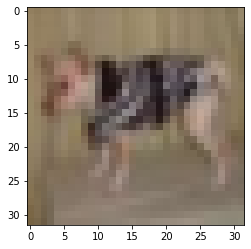

In [4]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
print(labels[y_train[idx][0]])
plt.imshow(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
layers = [
    # 1(3 * 3 * 3) * 64個 + 64 = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1(3 * 3 * 64) * 128個 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [6]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("model.h5", save_best_only=True)
]
# validation_split: 切出一部分資料驗證
# batch_size: 看多少筆才做一次調整(梯度下降)
# epochs: 訓練次數(60000-6000筆/epoch)
# 1 epoch 多少次梯度下降: 54000 / 200 -> 270
# verbose: 印出多少log(1:default 0:quiet 2:)
model.fit(x_train_norm, 
     y_train,
     validation_split=0.1,
     batch_size=200,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 11s - loss: 1.7327 - accuracy: 0.3516 - val_loss: 1.4316 - val_accuracy: 0.4746
Epoch 2/50
225/225 - 3s - loss: 1.3192 - accuracy: 0.5192 - val_loss: 1.2019 - val_accuracy: 0.5704
Epoch 3/50
225/225 - 3s - loss: 1.1375 - accuracy: 0.5946 - val_loss: 1.0633 - val_accuracy: 0.6206
Epoch 4/50
225/225 - 3s - loss: 1.0071 - accuracy: 0.6422 - val_loss: 1.0028 - val_accuracy: 0.6410
Epoch 5/50
225/225 - 3s - loss: 0.8932 - accuracy: 0.6852 - val_loss: 0.8732 - val_accuracy: 0.6970
Epoch 6/50
225/225 - 3s - loss: 0.8093 - accuracy: 0.7163 - val_loss: 0.7870 - val_accuracy: 0.7198
Epoch 7/50
225/225 - 3s - loss: 0.7528 - accuracy: 0.7337 - val_loss: 0.7422 - val_accuracy: 0.7390
Epoch 8/50
225/225 - 4s - loss: 0.6870 - accuracy: 0.7587 - val_loss: 0.7218 - val_accuracy: 0.7530
Epoch 9/50
225/225 - 4s - loss: 0.6371 - accuracy: 0.7749 - val_loss: 0.7092 - val_accuracy: 0.7524
Epoch 10/50
225/225 - 4s - loss: 0.5723 - accuracy: 0.7988 - val_loss: 0.6544 - val_accuracy: 0.779

In [9]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6803 - accuracy: 0.7781


[0.6802718639373779, 0.7781000137329102]

In [10]:
y_test_r = y_test.reshape(-1)
y_test_r

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [11]:
# sklearn: predict_proba/predict
# keras: predict/predict_classes
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
       index=["{}(真實)".format(labels[i]) for i in range(10)],
       columns=["{}(預測)".format(labels[i]) for i in range(10)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),826,24,42,6,10,3,9,9,29,42
automobile(真實),15,909,0,4,2,1,0,1,6,62
bird(真實),52,7,729,46,61,21,47,16,4,17
cat(真實),20,12,83,635,68,64,54,25,11,28
deer(真實),14,5,65,30,783,10,35,45,6,7
dog(真實),10,15,60,214,61,566,19,37,8,10
frog(真實),5,8,55,59,28,6,822,1,4,12
horse(真實),14,6,33,34,52,25,6,802,3,25
ship(真實),79,32,12,5,2,0,4,0,819,47
truck(真實),21,64,5,5,0,2,2,5,6,890


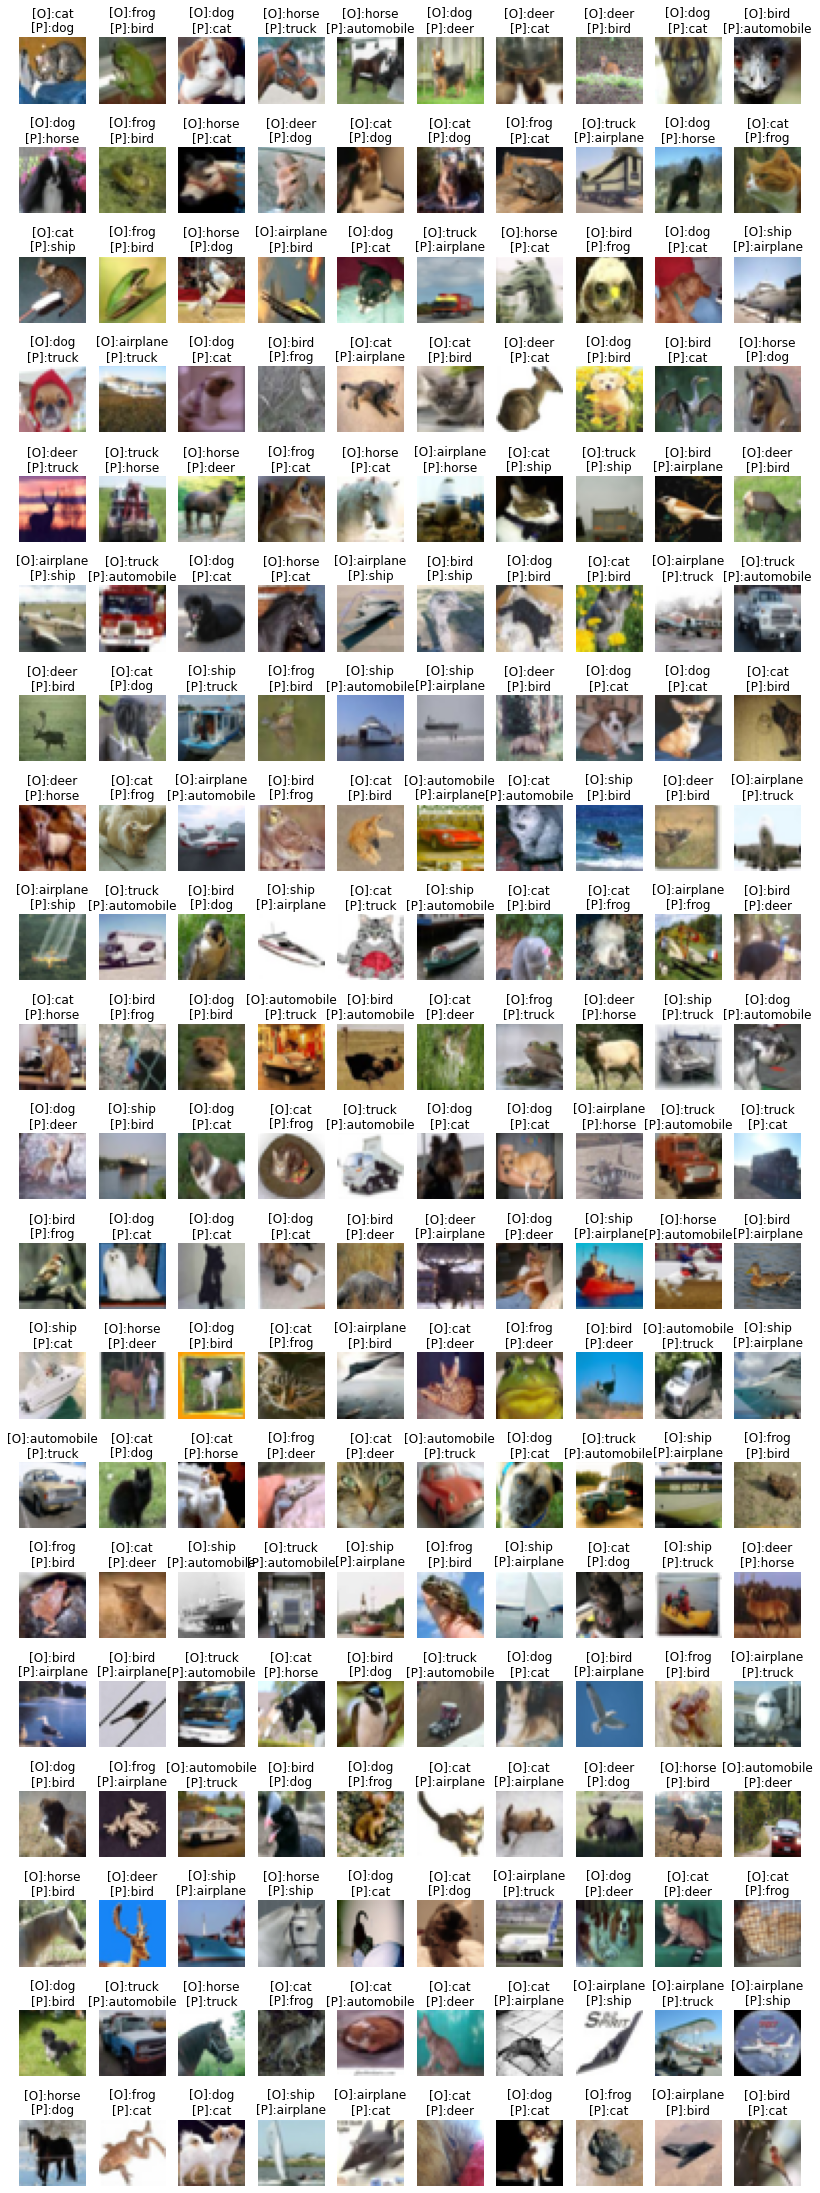

In [12]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_pre = pre[idx]
false_ori = y_test_r[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(labels[false_ori[i]], labels[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

url:https://i.ytimg.com/vi/RJzFICvJhGQ/maxresdefault.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


airplane 的機率: 0.998
automobile 的機率: 0.0
bird 的機率: 0.001
cat 的機率: 0.0
deer 的機率: 0.0
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0
答案: airplane


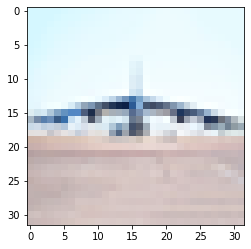

In [13]:
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import requests
url = input("url:")
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=headers)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img = np.array(img)
img_r = img.reshape(1, 32, 32, 3) / 255
proba = model.predict(img_r)[0]
for i in range(10):
    print(labels[i], "的機率:", round(proba[i], 3))
ans = model.predict_classes(img_r)[0]
print("答案:", labels[ans])
plt.imshow(img, cmap="gray")